In [60]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [62]:
def readCSV():
    data = pd.read_csv('/kaggle/input/medium-articles-dataset/medium_data.csv')
    return data 

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

def GetYear(Arr:np.ndarray):
    year = []
    month = []
    day = []
    for x in Arr:
        year.append(datetime.strptime(x, '%d-%m-%Y').year)
        month.append(datetime.strptime(x,'%d-%m-%Y').month)
        day.append(datetime.strptime(x,'%d-%m-%Y').day)

    return (day,month,year)

def performAnalysis(data:pd.DataFrame):
    #print(data.head())
    data = data.drop(['id'], axis=1)
    #lets see if there is a  relation between reading time and number of claps
    #first see if there is any NAN or not in those two columns
    #print(data.columns)
    '''for column in data.columns:
        print("{} , {}".format(column , sum(data[column].isna())))'''
    #print(np.where(data['claps'].isna()==True)[0])
    data = data.drop(np.where(data['claps'].isna()==True)[0] , axis=0 , inplace=False)
    print(data.describe())
    #print(data)
    subset = data[['claps','responses','reading_time']]
    #print(type(data['date'][0]))
    #print(subset.skew())    
    date_Arr = data['date']
    day , month ,year_Arr  = GetYear(date_Arr)
    data['year'] = year_Arr
    data['day'] = day
    data['month']=month
    corrMat = subset.corr()
    sns.heatmap(corrMat)
    plt.show()
    return data 


In [63]:

data = readCSV()
data = performAnalysis(data)
data.drop(['date'],axis=1)





TypeError: readCSV() takes 0 positional arguments but 1 was given

That means that response and claps have a strong correlation between them. Hence if for any article if response is higher than there is high probability that article will be appriciated.
May be we can draw scatter plt between the two variables in order to get the more clear understanding.
Based on the above description of the various features it can be inferred that feature 'responses' mean is highly effected by the outlier present in the response feature because 75% quartile is well below the 1 std from the mean.

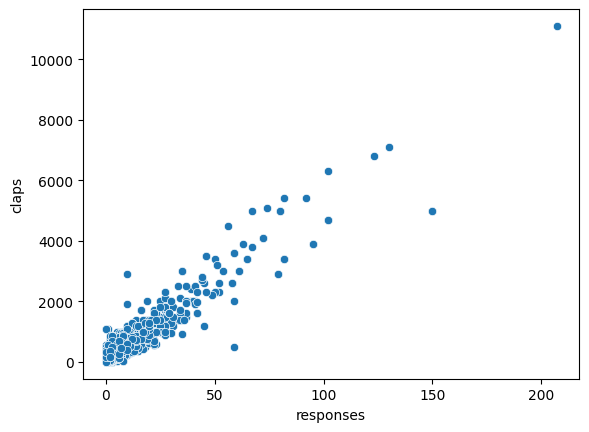

In [57]:
sns.scatterplot(data=data,x='responses',y='claps')
plt.show()

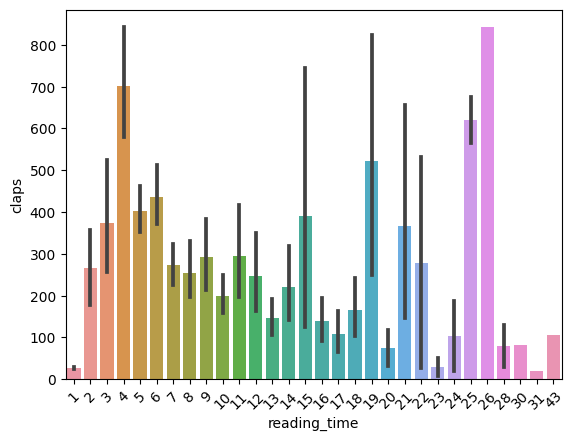

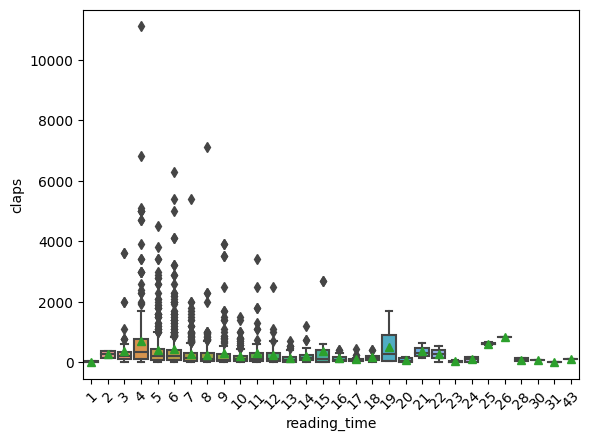

In [43]:
sns.barplot(x=data['reading_time'],y=data['claps'])
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x=data['reading_time'],y=data['claps'],showmeans=True)
plt.xticks(rotation=45)
plt.show()


Generally Short articles are more appriciated by audience.

In [46]:
print(data.year.unique())

[2023]


That means that this data is from the current year. Lets find month wise distribution for the articles.

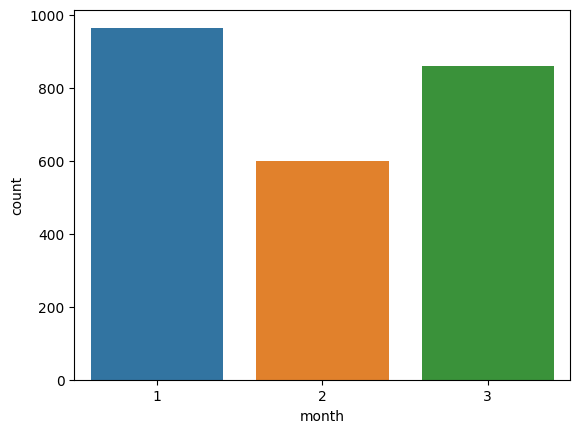

In [54]:
sns.countplot(data,x='month')
plt.show()
